In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sns
import squidpy as sq
import csv
from sklearn.metrics.pairwise import cosine_distances

In [2]:
ff_human_ovarian_cancer = sc.datasets.visium_sge('Parent_Visium_Human_OvarianCancer')
ff_human_ovarian_cancer.var_names_make_unique()

/Users/nataliecharitakis/opt/anaconda3/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
ff_human_ovarian_cancer

AnnData object with n_obs × n_vars = 3493 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [4]:
#Calculate some QC metrics for the data
ff_human_ovarian_cancer.var["mt"] = ff_human_ovarian_cancer.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(ff_human_ovarian_cancer, qc_vars=["mt"], inplace=True)

In [5]:
ff_human_ovarian_cancer.obs.sort_values(by=['pct_counts_mt'])
ff_human_ovarian_cancer = ff_human_ovarian_cancer[ff_human_ovarian_cancer.obs["pct_counts_mt"] < 15]
ff_human_ovarian_cancer = ff_human_ovarian_cancer[ff_human_ovarian_cancer.obs["pct_counts_mt"] > 2]
ff_human_ovarian_cancer.obs.sort_values(by=['pct_counts_mt'])

,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
ACCAATATGCAAGTTA-1,1,56,78,5402,8.594710,17398.0,9.764168,20.881711,29.997701,39.435567,52.000230,349.0,5.857933,2.005978
ATACAGGCCCTCCAAT-1,1,56,72,4578,8.429236,12459.0,9.430279,19.319368,28.790433,38.205313,51.079541,250.0,5.525453,2.006582
AAGCACCCTGCGTATC-1,1,59,73,4755,8.467162,13992.0,9.546312,21.540881,31.060606,40.051458,52.744425,285.0,5.655992,2.036878
CGCACATGTCCACTAC-1,1,39,87,3331,8.111328,6953.0,8.847073,17.071768,25.557313,35.222206,50.021573,142.0,4.962845,2.042284
AGTTTGCACCTGCCTC-1,1,58,74,5928,8.687611,21151.0,9.959490,21.176304,30.272800,39.359841,51.798969,433.0,6.073044,2.047184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTCGGGTTCTCTGGCC-1,1,61,27,3781,8.238008,10182.0,9.228475,29.787861,37.723434,45.550972,57.218621,1521.0,7.327781,14.938127
CGATTTGTCATTAATG-1,1,75,25,3693,8.214465,8298.0,9.023890,26.042420,32.610268,39.696312,52.012533,1240.0,7.123673,14.943359
ACTTGCTCTATCTACC-1,1,69,3,4471,8.405591,11090.0,9.313890,25.455365,32.146078,39.467989,51.027953,1659.0,7.414573,14.959423
ACCGGTCAGGTACACC-1,1,59,15,3345,8.115521,8411.0,9.037415,29.461420,37.890857,46.284627,58.411604,1259.0,7.138867,14.968493


In [6]:
ff_human_ovarian_cancer.var["mt"]
ff_human_ovarian_cancer.var.sort_values(by=['mt'])

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,False,0,0.000000,0.000000,100.000000,0.0,0.000000
RAB15,ENSG00000139998,Gene Expression,GRCh38,False,214,0.065273,0.063231,93.873461,228.0,5.433722
GPX2,ENSG00000176153,Gene Expression,GRCh38,False,2,0.000573,0.000572,99.942743,2.0,1.098612
CHURC1,ENSG00000258289,Gene Expression,GRCh38,False,1818,0.846837,0.613474,47.953049,2958.0,7.992607
SPTB,ENSG00000070182,Gene Expression,GRCh38,False,16,0.004867,0.004855,99.541941,17.0,2.890372
...,...,...,...,...,...,...,...,...,...,...
MT-ND1,ENSG00000198888,Gene Expression,GRCh38,True,3493,72.984543,4.303856,0.000000,254935.0,12.448768
MT-ND6,ENSG00000198695,Gene Expression,GRCh38,True,238,0.073862,0.071262,93.186373,258.0,5.556828
MT-CYB,ENSG00000198727,Gene Expression,GRCh38,True,3489,34.320927,3.564476,0.114515,119883.0,11.694280
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,True,3493,90.724876,4.518794,0.000000,316902.0,12.666351


In [7]:
ff_human_ovarian_cancer.obs

,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACAAGTATCTCCCA-1,1,50,102,2460,7.808323,4752.0,8.466531,23.106061,31.439394,40.551347,55.239899,393.0,5.976351,8.270202
AAACACCAATAACTGC-1,1,59,19,3842,8.254009,10543.0,9.263312,29.887129,38.594328,46.618610,57.839325,1436.0,7.270313,13.620413
AAACAGGGTCTATATT-1,1,47,13,3840,8.253488,10174.0,9.227689,26.567722,34.824061,42.815019,55.258502,1300.0,7.170888,12.777668
AAACATTTCCCGGATT-1,1,61,97,2638,7.878155,5198.0,8.556222,22.912659,30.377068,39.399769,53.982301,477.0,6.169611,9.176607
AAACCCGAACGAAATC-1,1,45,115,3770,8.235095,8803.0,9.082961,18.118823,26.684085,35.681018,49.733046,190.0,5.252274,2.158355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCAGTGTGCTAC-1,1,24,64,5374,8.589514,15281.0,9.634431,17.374517,25.914534,34.742491,47.411819,486.0,6.188264,3.180420
TTGTTGTGTGTCAAGA-1,1,31,77,4085,8.315322,10426.0,9.252154,22.817955,32.284673,40.974487,53.318627,752.0,6.624065,7.212737
TTGTTTCACATCCAGG-1,1,58,42,3210,8.074338,7732.0,8.953252,23.629074,33.484221,42.964304,56.492499,593.0,6.386879,7.669426
TTGTTTCATTAGTCTA-1,1,60,30,2831,7.948738,6291.0,8.747034,26.100779,33.635352,42.298522,56.302655,826.0,6.717805,13.129868


<IPython.core.display.Javascript object>


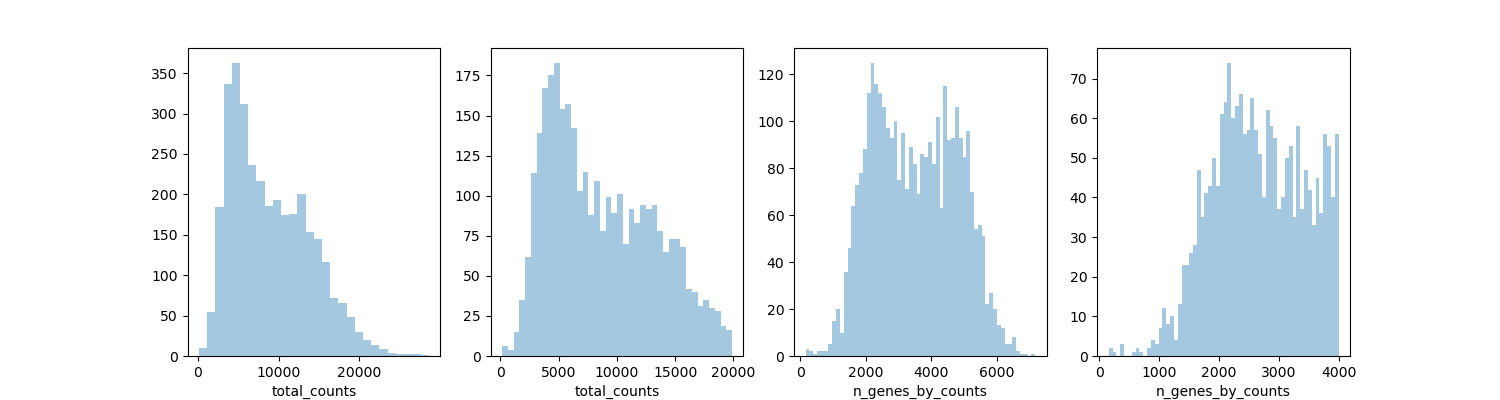

/var/folders/z2/blpwq8wx3p37k5lbxzs9vyf80000gn/T/ipykernel_68823/2247817540.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ff_human_ovarian_cancer.obs["total_counts"], kde=False, ax=axs[0])
/var/folders/z2/blpwq8wx3p37k5lbxzs9vyf80000gn/T/ipykernel_68823/2247817540.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

<IPython.core.display.Javascript object>


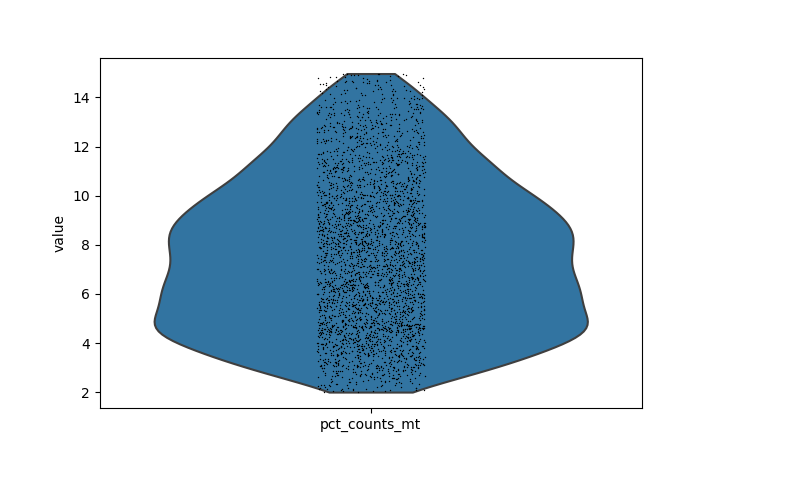

In [8]:
#Visualise some QC metrics for the data
%matplotlib notebook

fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(ff_human_ovarian_cancer.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(ff_human_ovarian_cancer.obs["total_counts"][ff_human_ovarian_cancer.obs["total_counts"] < 20000], kde=False, bins=40, ax=axs[1])
sns.distplot(ff_human_ovarian_cancer.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(ff_human_ovarian_cancer.obs["n_genes_by_counts"][ff_human_ovarian_cancer.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])
sc.pl.violin(ff_human_ovarian_cancer,['pct_counts_mt'])

In [9]:
ff_human_ovarian_cancer

AnnData object with n_obs × n_vars = 3326 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [10]:
#Perform some filtering
sc.pp.filter_cells(ff_human_ovarian_cancer, min_counts=2000)
print(f'Number of cells after min count filter: {ff_human_ovarian_cancer.n_obs}')
sc.pp.filter_cells(ff_human_ovarian_cancer, max_counts=20000)
print(f'Number of cells after max count filter: {ff_human_ovarian_cancer.n_obs}')
ff_human_ovarian_cancer = ff_human_ovarian_cancer[ff_human_ovarian_cancer.obs["pct_counts_mt"] < 15]
ff_human_ovarian_cancer = ff_human_ovarian_cancer[ff_human_ovarian_cancer.obs["pct_counts_mt"] > 2]
print(f"#cells after MT filter: {ff_human_ovarian_cancer.n_obs}")
#Filter out genes that are detected in less than 10 cells
sc.pp.filter_genes(ff_human_ovarian_cancer, min_cells=10)
print(f'Number of genes after cell filter: {ff_human_ovarian_cancer.n_vars}')
sc.pp.filter_cells(ff_human_ovarian_cancer, min_genes = 2000)
print(f'Number of cells after gene filter: {ff_human_ovarian_cancer.n_obs}')

Number of cells after min count filter: 3275
Number of cells after max count filter: 3207
#cells after MT filter: 3207
Number of genes after cell filter: 17795
Number of cells after gene filter: 2837


/Users/nataliecharitakis/opt/anaconda3/envs/squidpy/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [11]:
##Do normalisation and find highly variable genes
sc.pp.normalize_total(ff_human_ovarian_cancer, inplace=True)
sc.pp.log1p(ff_human_ovarian_cancer)
sc.pp.highly_variable_genes(ff_human_ovarian_cancer, flavor="seurat", n_top_genes=2000)

<IPython.core.display.Javascript object>


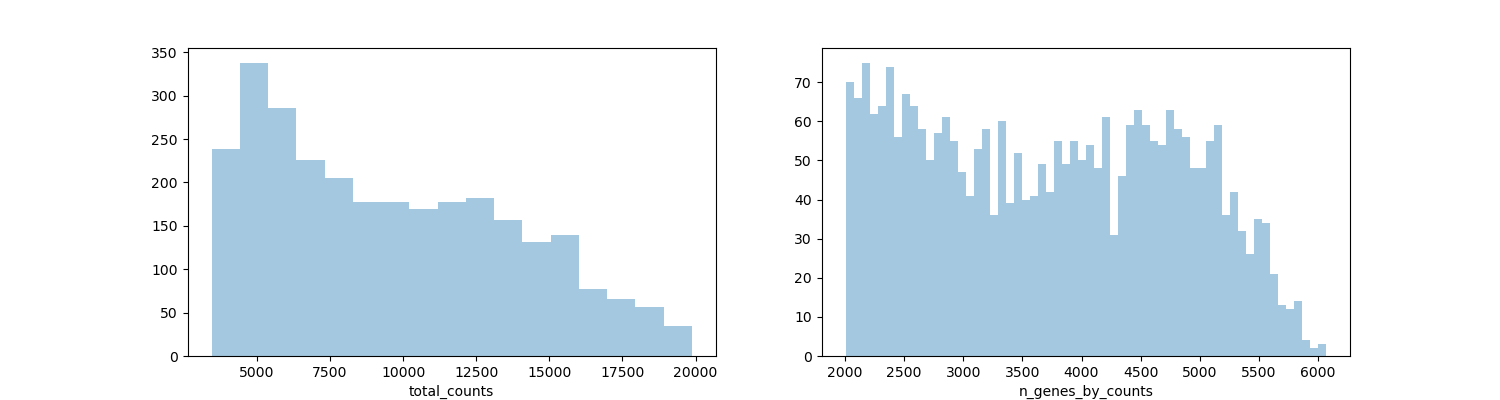

/var/folders/z2/blpwq8wx3p37k5lbxzs9vyf80000gn/T/ipykernel_68823/818538527.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ff_human_ovarian_cancer.obs["total_counts"], kde=False, ax=axs[0])
/var/folders/z2/blpwq8wx3p37k5lbxzs9vyf80000gn/T/ipykernel_68823/818538527.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

<AxesSubplot: xlabel='n_genes_by_counts'>

In [12]:
#Look at distribution after normalisation
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(ff_human_ovarian_cancer.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(ff_human_ovarian_cancer.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])

In [13]:
#Perform next steps in cluster identification
sc.pp.pca(ff_human_ovarian_cancer,n_comps=20)
sc.pp.neighbors(ff_human_ovarian_cancer)
sc.tl.umap(ff_human_ovarian_cancer)
sc.tl.leiden(ff_human_ovarian_cancer, key_added='clusters')

/Users/nataliecharitakis/opt/anaconda3/envs/squidpy/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<IPython.core.display.Javascript object>


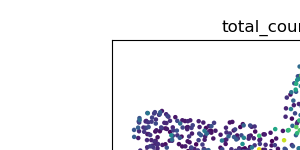

/Users/nataliecharitakis/opt/anaconda3/envs/squidpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [14]:
#Do some umap visualisations
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(ff_human_ovarian_cancer, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

<IPython.core.display.Javascript object>


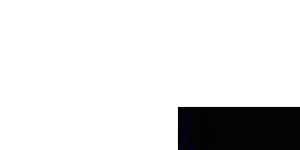

In [15]:
#Visualise in spatial coordinates
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(ff_human_ovarian_cancer, img_key="hires", color=["total_counts", "n_genes_by_counts"])

<IPython.core.display.Javascript object>


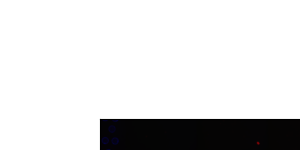

In [16]:
#Visualise cell type clusters by spatial organisation
sc.pl.spatial(ff_human_ovarian_cancer, img_key="hires", color="clusters", size=1.5)

<IPython.core.display.Javascript object>


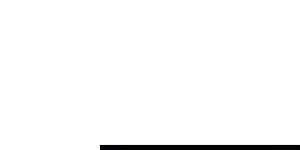

In [17]:
#Pick a gene to do a visualisation on the section - let's try c3 can fix this for presentation
#Can also do this alongside clusters
sc.pl.spatial(ff_human_ovarian_cancer, img_key = "hires", color="HLA-B")

### Find SVGs using squidpy

In [18]:
##Run moran's I on all genes not just HVGs
sq.gr.spatial_neighbors(ff_human_ovarian_cancer, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(ff_human_ovarian_cancer, genes=ff_human_ovarian_cancer.var_names, use_raw=False, mode="moran")
ff_human_ovarian_cancer.uns["moranI"].head(10)

,I,pval_norm,var_norm,pval_norm_fdr_bh
IGHG4,0.776498,0.0,0.000118,0.0
IGKC,0.774099,0.0,0.000118,0.0
IGHG3,0.754957,0.0,0.000118,0.0
IGLC2,0.688609,0.0,0.000118,0.0
IGHA1,0.688435,0.0,0.000118,0.0
MALAT1,0.670346,0.0,0.000118,0.0
IGLC1,0.663894,0.0,0.000118,0.0
IGHG1,0.662533,0.0,0.000118,0.0
MT-CO1,0.647152,0.0,0.000118,0.0
MT-ND1,0.634318,0.0,0.000118,0.0


In [19]:
moran_I = pd.DataFrame(ff_human_ovarian_cancer.uns['moranI'].sort_values(ascending=False,by=['I']))

moran_I.to_csv('ff_human_ovarian_cancer_squidpy_moranI_results_all.csv')

In [ ]:
##Sort this so corrected pvalue is above 0.05 and I is above 0.5
moran_I = moran_I[moran_I['pval_norm_fdr_bh'] <=0.05]

##The expected value under Moran's spatial autocorrelation is E(I) = -1/(N-1) where N is number of samples or in this case genes
moran_I = moran_I[moran_I['I'] > 0]
moran_I

In [21]:
##Write these out to file until figure out how to filter
moran_I.to_csv("ff_human_ovarian_cancer_squidpy_moranI_results_pval_fdr_bh_0.05_moransI_positive.csv")